2024-04-30 15:29:23.777874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907


640/640 [==============================] - 13s 20ms/step


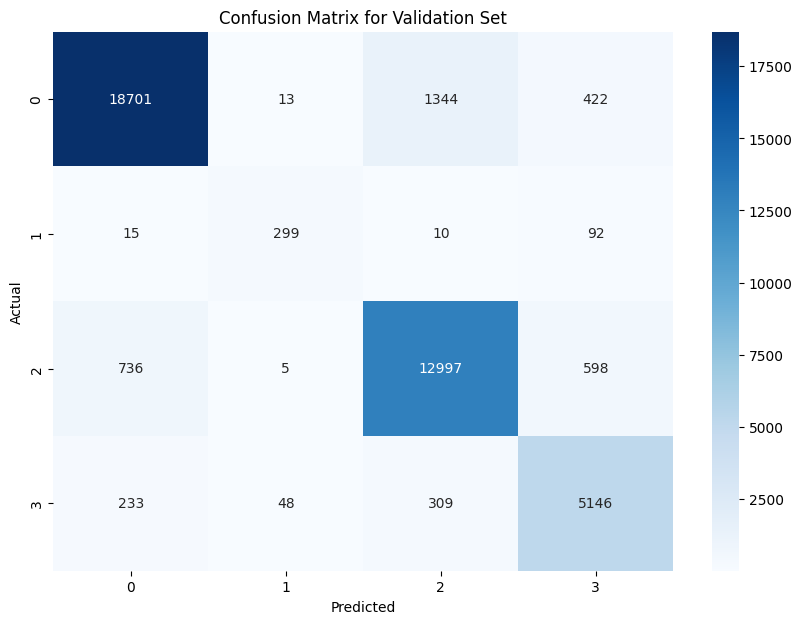

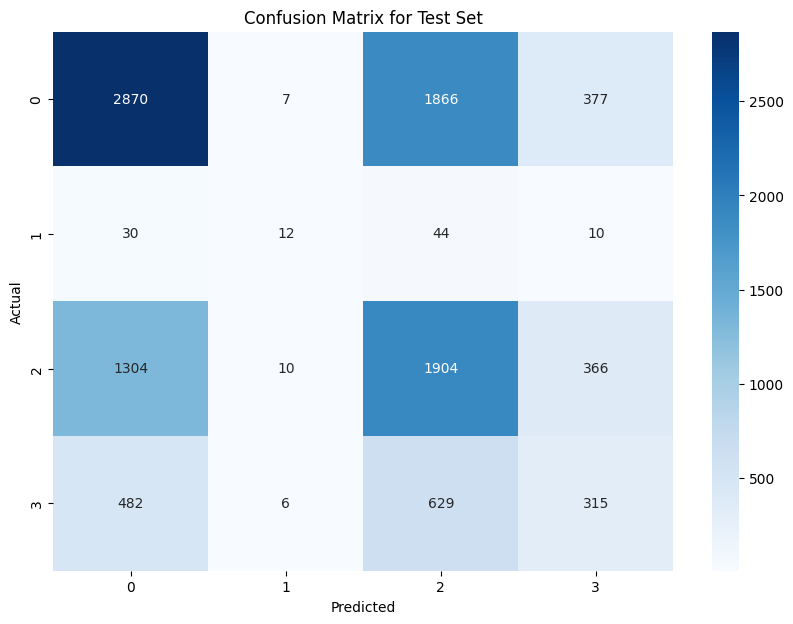

In [3]:
### K-fold confusion matrix for train and test
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load images and labels (ensure this matches your dataset structure)
def load_images_and_labels(base_path, input_shape):
    images = []
    labels = []
    label_map = {}
    class_id = 0
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith((".jpg", ".png")):
                    img_path = os.path.join(folder_path, filename)
                    img = load_img(img_path, target_size=(input_shape[0], input_shape[1]))
                    img = img_to_array(img)
                    img = preprocess_input(img)
                    images.append(img)
                    labels.append(class_id)
            label_map[folder_name] = class_id
            class_id += 1
    return np.array(images), np.array(labels), label_map

# Load the model
model = tf.keras.models.load_model('model/best_model_fold_3.h5')

# Load validation and test data
val_images, val_labels, _ = load_images_and_labels('alzheimer_gabor_8/train', (176, 208, 3))
test_images, test_labels, _ = load_images_and_labels('alzheimer_gabor_8/test', (176, 208, 3))

val_labels = to_categorical(val_labels, num_classes=4)
test_labels = to_categorical(test_labels, num_classes=4)

# Create Data Generators for the validation and test sets
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

val_gen = val_datagen.flow(val_images, val_labels, batch_size=16, shuffle=False)
test_gen = test_datagen.flow(test_images, test_labels, batch_size=16, shuffle=False)

# Predictions
val_preds = model.predict(val_gen)
val_preds = np.argmax(val_preds, axis=1)
test_preds = model.predict(test_gen)
test_preds = np.argmax(test_preds, axis=1)

# True labels
true_val_labels = np.argmax(val_labels, axis=1)
true_test_labels = np.argmax(test_labels, axis=1)

# Confusion matrices
cm_val = confusion_matrix(true_val_labels, val_preds)
cm_test = confusion_matrix(true_test_labels, test_preds)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plotting
plot_confusion_matrix(cm_val, 'Confusion Matrix for Validation Set')
plot_confusion_matrix(cm_test, 'Confusion Matrix for Test Set')


test_accuracy,▁
test_loss,▁
test_accuracy,0.59411
test_loss,1.42481


Found 5121 images belonging to 4 classes.
Found 1291 images belonging to 4 classes.


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 176, 208,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 182, 214,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 88, 104,   │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 88, 104,   │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 88, 104,   │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 90, 106,   │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 44, 52,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 44, 52,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 44, 52,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 44, 52,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 44, 52,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 44, 52,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 44, 52,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 44, 52,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 44, 52,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 44, 52,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 44, 52,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 4,728,452 (18.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 176, 208,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 182, 214,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 88, 104,   │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 88, 104,   │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 88, 104,   │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 90, 106,   │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 44, 52,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 44, 52,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 44, 52,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 44, 52,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 44, 52,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 44, 52,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 44, 52,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 44, 52,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 44, 52,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 44, 52,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 44, 52,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 4,728,452 (18.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

Epoch 1/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2297 - loss: 1.4165
Epoch 1: val_accuracy improved from -inf to 0.37335, saving model to model/best_model_ResNet_01_0.3734.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.2308 - loss: 1.4157 - val_accuracy: 0.3734 - val_loss: 1.3696
Epoch 2/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3562 - loss: 1.3262
Epoch 2: val_accuracy improved from 0.37335 to 0.48180, saving model to model/best_model_ResNet_02_0.4818.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.3569 - loss: 1.3251 - val_accuracy: 0.4818 - val_loss: 1.2126
Epoch 3/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4312 - loss: 1.1975
Epoch 3: val_accuracy did not improve from 0.48180
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4315 - loss: 1.1972 - val_accuracy: 0.4020 - val_loss: 1.2716
Epoch 4/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4355 - loss: 1.1566
Epoch 4: val_accuracy improved fr

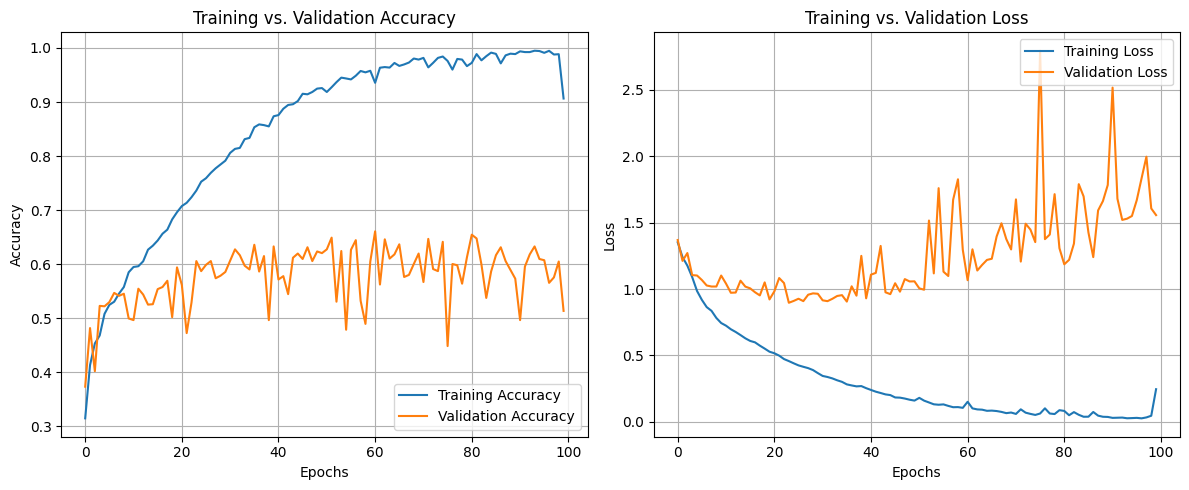

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5127 - loss: 1.6032
Test accuracy: 0.5136
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step


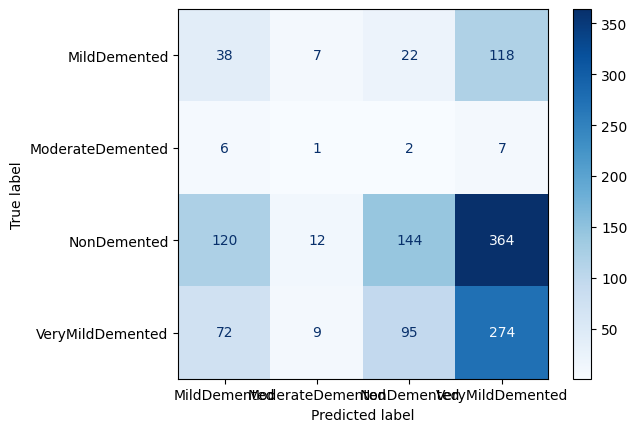

Model saved successfully as 'alzheimer_model_resnet50_0.5136.keras'.


In [8]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50  # Using ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import wandb
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout

# Initialize wandb and config
wandb.init(
    project="computer_vision",
    config={
        "learning_rate": 0.000005,
        "architecture": "ResNet50",
        "dataset": "alzheimer",
        "epochs": 100,
        "batch_size": 32,
        "input_shape": (176, 208, 3),
        "num_classes": 4
    }
)

config = wandb.config

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical'
)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Create the ResNet50 model with reduced dropout and without class weights
def create_resnet_model(input_shape, num_classes, dropout_rate=0.3):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[:-10]:
        layer.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Initialize ResNet model
model = create_resnet_model(config.input_shape, config.num_classes)

# Create an Adam optimizer with a lower learning rate
optimizer = Adam(
    learning_rate=config.learning_rate,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print and log model summary
model.summary()
wandb.log({'model_summary': model.summary()})

# Create a checkpoint callback
checkpoint_callback = ModelCheckpoint(
    'model/best_model_ResNet_{epoch:02d}_{val_accuracy:.4f}.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model using class weights
history = model.fit(
    train_generator,
    epochs=config.epochs,
    validation_data=test_generator,
    class_weight=class_weight_dict,  # Apply class weights here
    callbacks=[checkpoint_callback]
)

# Plot training & validation loss/accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Training vs. Validation Loss')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
wandb.log({'test_loss': test_loss, 'test_accuracy': test_acc})
print(f'Test accuracy: {test_acc:.4f}')

# Generate a confusion matrix
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=-1)

cm = confusion_matrix(y_true, y_pred)
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Save the model
model_filename = f'alzheimer_model_resnet50_{test_acc:.4f}.keras'
model.save(os.path.join('model', model_filename))
print(f"Model saved successfully as '{model_filename}'.")
